# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [17]:
# ! pip install mlxtend

In [163]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

Let's generate our dataset and take a look on it.

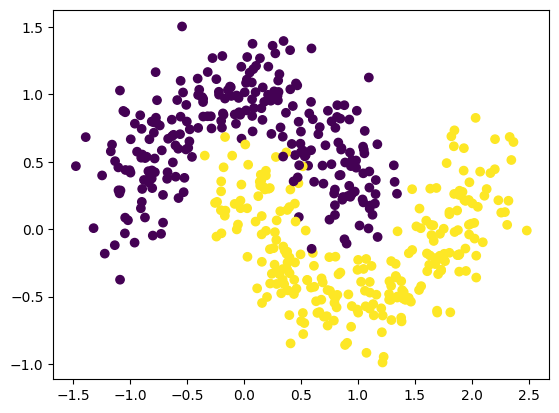

In [19]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [20]:
xm_train, xm_test, ym_train, ym_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=1, stratify=moons_labels)

In [118]:
def plot_decisions(name, model, x_train, y_train, x_test, y_test, x_all, y_all):
    model.fit(x_train, y_train)
    acc_train = accuracy_score(y_train, model.predict(x_train))
    acc_test = accuracy_score(y_test, model.predict(x_test))
    plot_decision_regions(x_all, y_all, model)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{name} | Train accuracy={acc_train:.3f}, Test accuracy={acc_test:.3f}")
    plt.show()
    return acc_train, acc_test

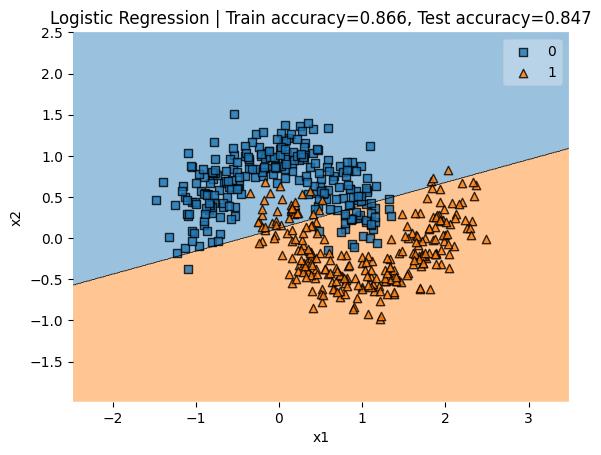

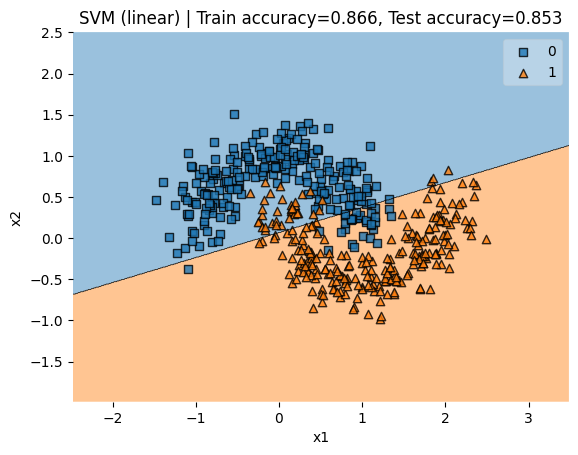

In [119]:
lr = LogisticRegression(C=10, solver="lbfgs", max_iter=1000)
svm_lin = SVC(kernel='linear', C=10)

acc_lr = plot_decisions("Logistic Regression", lr, xm_train, ym_train, xm_test, ym_test, moons_points, moons_labels)
acc_svm_lin = plot_decisions("SVM (linear)", svm_lin, xm_train, ym_train, xm_test, ym_test, moons_points, moons_labels)

In [120]:
print(f"Logistic regression: Train accuracy = {acc_lr[0]:.3f}, Test accuracy = {acc_lr[1]:.3f}")
print(f"SVM (linear):        Train accuracy = {acc_svm_lin[0]:.3f}, Test accuracy = {acc_svm_lin[1]:.3f}")

Logistic regression: Train accuracy = 0.866, Test accuracy = 0.847
SVM (linear):        Train accuracy = 0.866, Test accuracy = 0.853


Обе модели дали почти одинаковый результат (SVM (linear) был чуть лучше). Линейные модели недообучены на «полумесяцах», им не хватает нелинейности для разделения классов

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

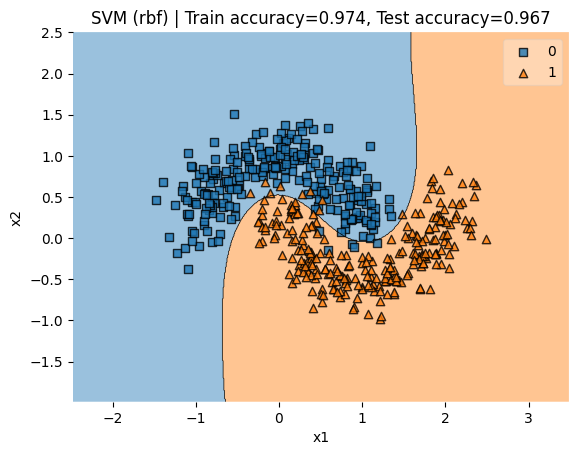

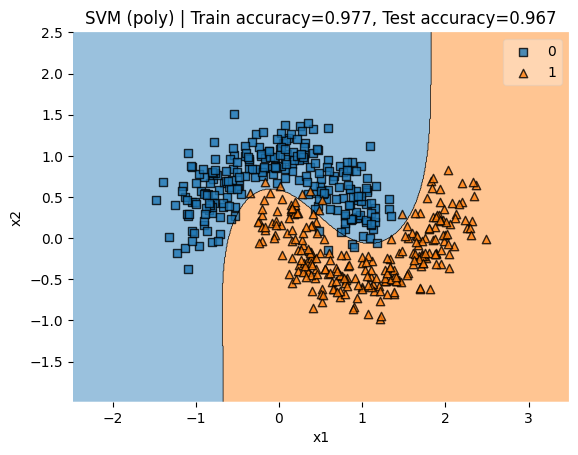

In [121]:
svm_rbf = SVC(kernel='rbf', C=0.5, gamma="scale")
svm_poly = SVC(kernel='poly', degree=3, C=0.4, gamma=1, coef0=2)

acc_svm_rbf = plot_decisions("SVM (rbf)", svm_rbf, xm_train, ym_train, xm_test, ym_test, moons_points, moons_labels)
acc_svm_poly = plot_decisions("SVM (poly)", svm_poly, xm_train, ym_train, xm_test, ym_test, moons_points, moons_labels)

In [122]:
print(f"SVM (linear): Train accuracy = {acc_svm_lin[0]:.3f}, Test accuracy = {acc_svm_lin[1]:.3f}")
print(f"SVM (rbf):    Train accuracy = {acc_svm_rbf[0]:.3f}, Test accuracy = {acc_svm_rbf[1]:.3f}")
print(f"SVM (poly):    Train accuracy = {acc_svm_poly[0]:.3f}, Test accuracy = {acc_svm_poly[1]:.3f}")

SVM (linear): Train accuracy = 0.866, Test accuracy = 0.853
SVM (rbf):    Train accuracy = 0.974, Test accuracy = 0.967
SVM (poly):    Train accuracy = 0.977, Test accuracy = 0.967


При ядре "rbf" и "poly" качество модели выросло. При ядре "sigmoid" результаты получились хуже результатов линейной модели. При "poly" deg=2 несмог дать нужную кривизну, deg=4 начал перегибать и не дал результата похуже; deg=3 оказался лучшим выбором и дал почти одинаковый результат, который дал "rbf".

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

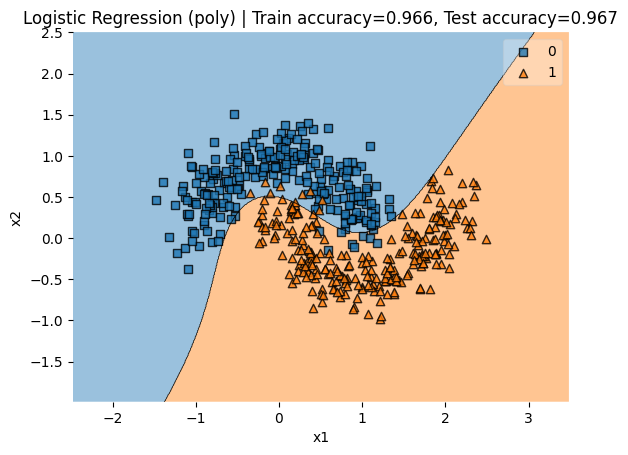

Logistic regression (poly): Train accuracy = 0.966, Test accuracy = 0.967


In [148]:
pipe = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                     LogisticRegression(C=1, solver="lbfgs", max_iter=1000))

acc_lr_poly = plot_decisions("Logistic Regression (poly)", pipe, xm_train, ym_train, xm_test, ym_test, moons_points, moons_labels)
print(f"Logistic regression (poly): Train accuracy = {acc_lr_poly[0]:.3f}, Test accuracy = {acc_lr_poly[1]:.3f}")

Получилось почти такой же результат, что у SVM с ядром "rbf" или "poly". Лучшая степень 3, такую же получили при SVM poly.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

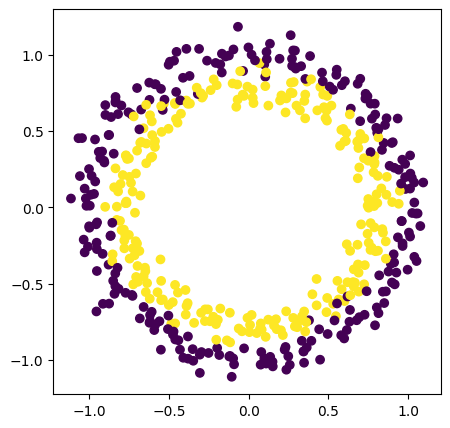

In [149]:
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

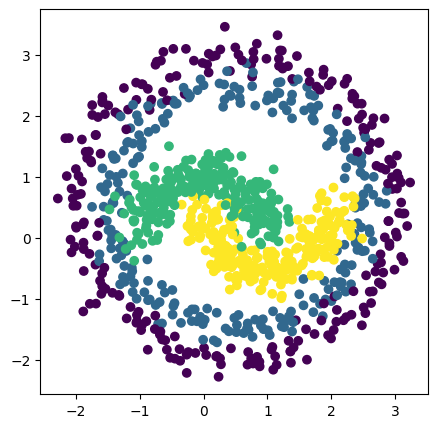

In [150]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [155]:
points.shape, labels.shape

((1000, 2), (1000,))

In [157]:
np.unique(labels)

array([0, 1, 2, 3])

In [279]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=1, stratify=labels)

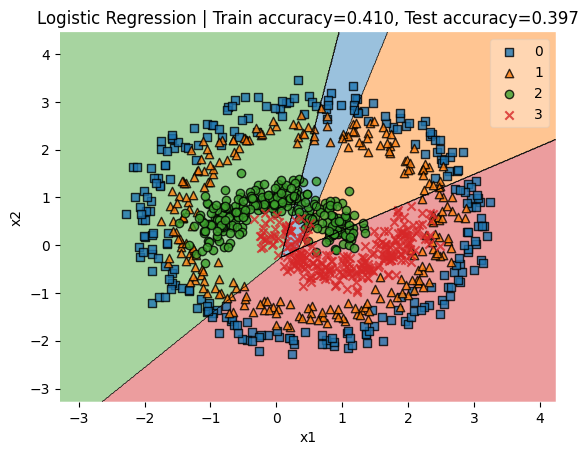

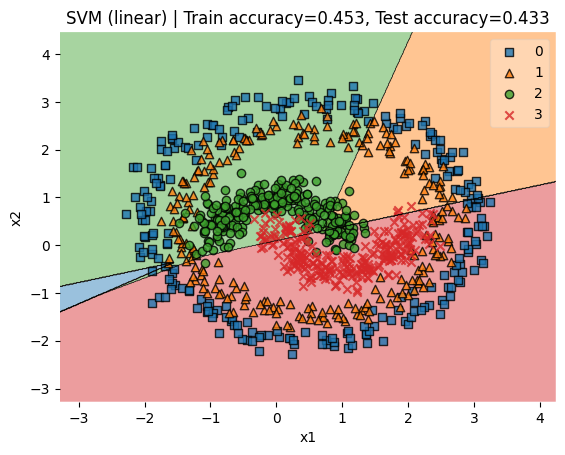

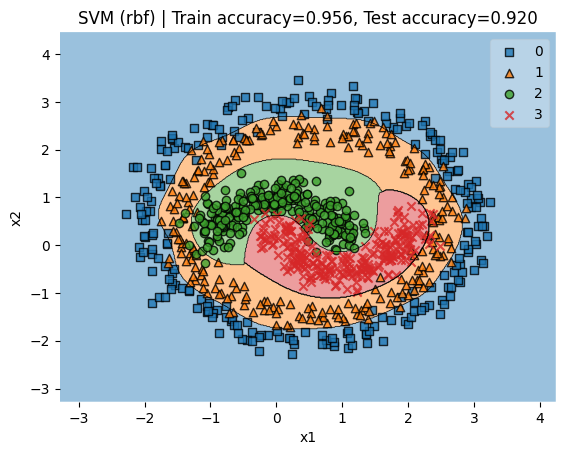

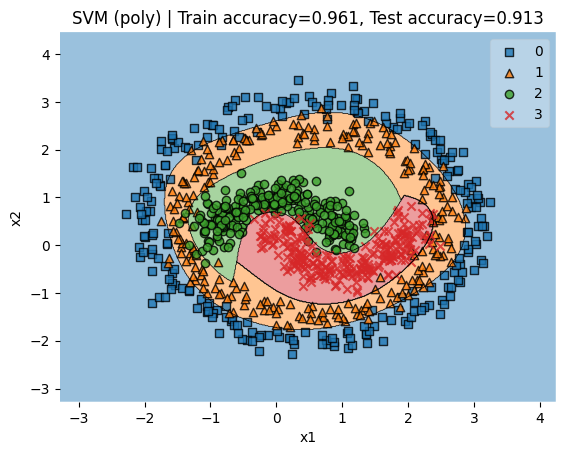

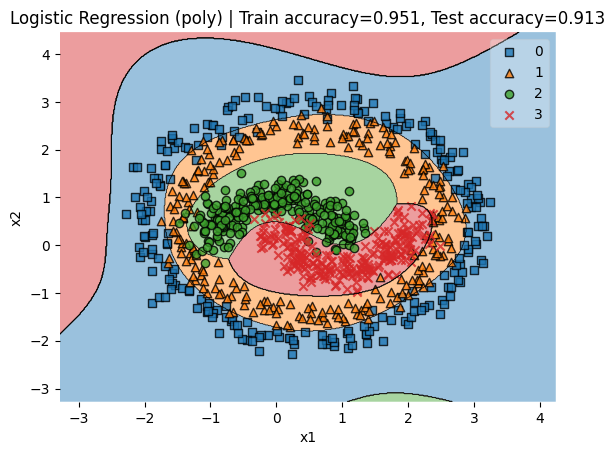

In [280]:
lr = LogisticRegression(C=10, solver="lbfgs", max_iter=1000)
svm_lin = SVC(kernel='linear', C=10)
svm_rbf = SVC(kernel='rbf', C=2, gamma=2)
svm_poly = SVC(kernel='poly', degree=5, C=0.5, gamma=1, coef0=2)
pipe = make_pipeline(PolynomialFeatures(degree=5, include_bias=False),
                     LogisticRegression(C=2, solver="liblinear", max_iter=1000))

acc_lr = plot_decisions("Logistic Regression", lr, x_train, y_train, x_test, y_test, points, labels)
acc_svm_lin = plot_decisions("SVM (linear)", svm_lin, x_train, y_train, x_test, y_test, points, labels)
acc_svm_rbf = plot_decisions("SVM (rbf)", svm_rbf, x_train, y_train, x_test, y_test, points, labels)
acc_svm_poly = plot_decisions("SVM (poly)", svm_poly, x_train, y_train, x_test, y_test, points, labels)
acc_lr_poly = plot_decisions("Logistic Regression (poly)", pipe, x_train, y_train, x_test, y_test, points, labels)

In [281]:
print(f"Logistic regression:        Train accuracy = {acc_lr[0]:.3f}, Test accuracy = {acc_lr[1]:.3f}")
print(f"SVM (linear):               Train accuracy = {acc_svm_lin[0]:.3f}, Test accuracy = {acc_svm_lin[1]:.3f}")
print(f"SVM (rbf):                  Train accuracy = {acc_svm_rbf[0]:.3f}, Test accuracy = {acc_svm_rbf[1]:.3f}")
print(f"SVM (poly):                 Train accuracy = {acc_svm_poly[0]:.3f}, Test accuracy = {acc_svm_poly[1]:.3f}")
print(f"Logistic regression (poly): Train accuracy = {acc_lr_poly[0]:.3f}, Test accuracy = {acc_lr_poly[1]:.3f}")

Logistic regression:        Train accuracy = 0.410, Test accuracy = 0.397
SVM (linear):               Train accuracy = 0.453, Test accuracy = 0.433
SVM (rbf):                  Train accuracy = 0.956, Test accuracy = 0.920
SVM (poly):                 Train accuracy = 0.961, Test accuracy = 0.913
Logistic regression (poly): Train accuracy = 0.951, Test accuracy = 0.913


SVM-RBF показал лучший результат. Почти также хорошие результаты показазали SVM-Poly и Logistic regression + PolyFeatures. Обычный Logistic regression и SVM-linear дали плохой результат, ведь они линейные модели, и такие сложные данные разделить линиями не получится, что видим на графиках. Параметры я выбрал вручную, но если попробовать с помощью GridSearch, возможно можно удучшить результаты SVM-RBF, SVM-Poly и Logistic regression + PolyFeatures. Можно было ещё нормализовать данные, но в данном случае нет смысла.